# Lab/Assignment 2: Helmholtz coils

A figure of Helmholtz coils is shown below-- basically two coils of radius R separated by a distance that is equal to R.  This configuration was shown to have a particularly uniform field volume in the center- basically the first and second derivatives of the field vanished in the central volume.  






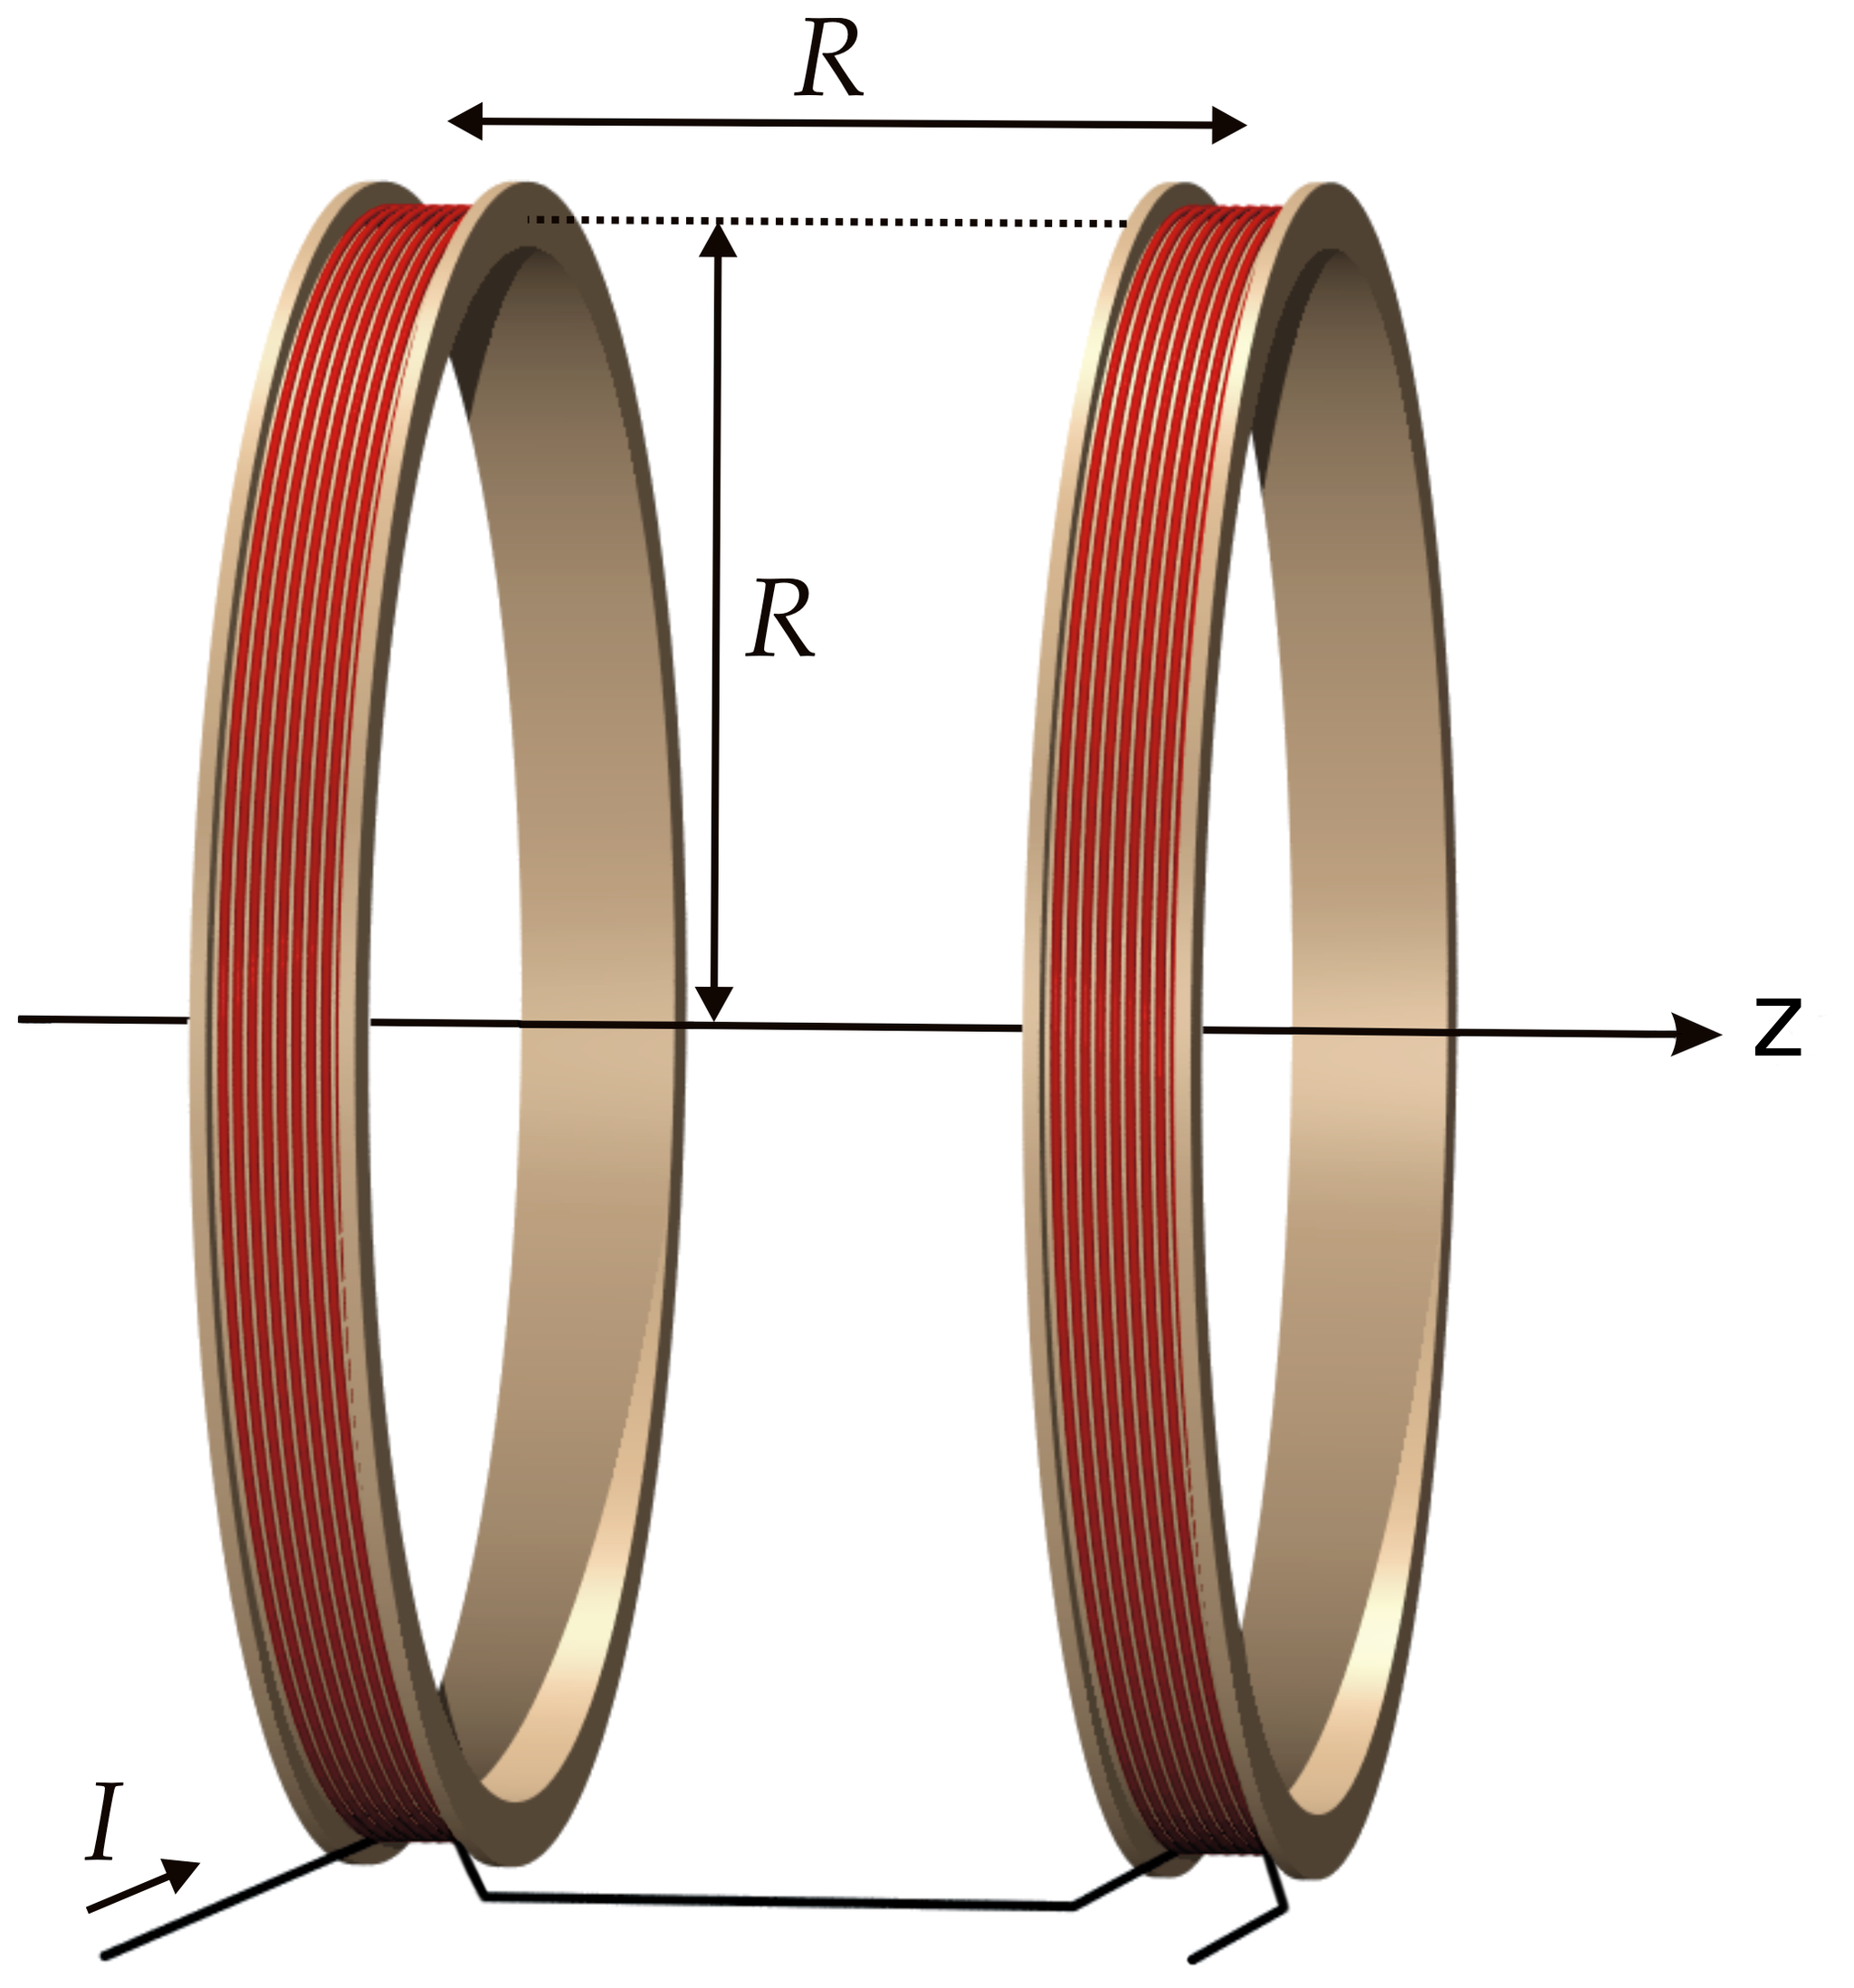
(Ansgar Hellwig, CC BY-SA 2.0 DE <https://creativecommons.org/licenses/by-sa/2.0/de/deed.en>, via Wikimedia Commons)

The following steps will lead you through the calculation of the magnetic field. Assume that the cylindrical radius $\rho=R=20~\rm{cm}$, and that each coil has 100 turns, and carries a current of 0.5 ampere. The wire is arranged in 10 layers of 10 turns. The wires (22 gauge magnet wire) have a diameter of 0.7 mm, so the cross section of the coil is 0.77 cm x 0.7 cm. The 0.77 cm comes because 10 turns of wire in a spiral needs 11 widths(one turn needs two widths).

Finally, you will plot the x and z components of the field along the z and x axes, zooming in on the region in the center of the coils where the field is flat. C

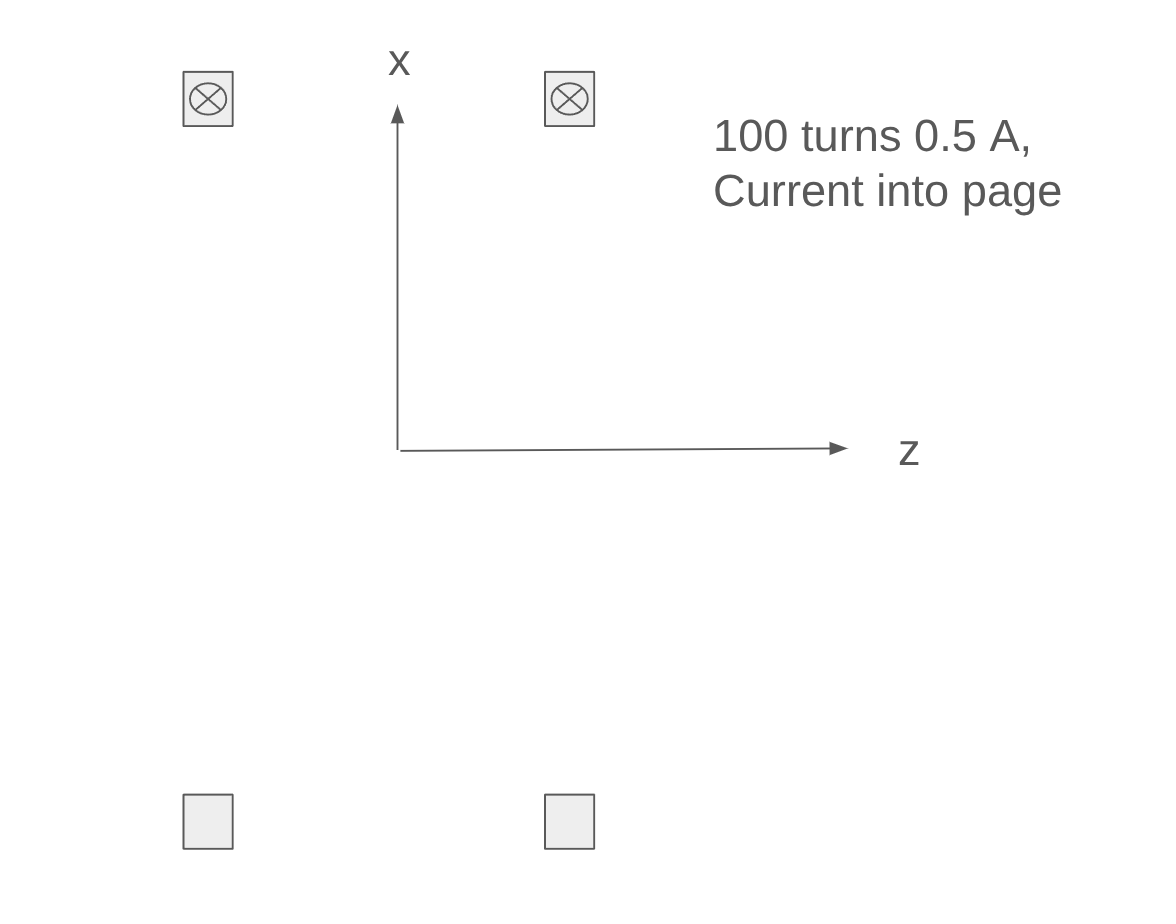 




The following steps will lead you through the calculation of the magnetic field, ignoring the geometry of the wires.  Assume that R=20 cm, and that each coil has 100 turns, and carries a current of 0.5 ampere, and are arranged in 10 layers of 10 turns, and the centers of the coil are at $z=\pm10\rm{~cm}.$  The wires (22 gauge magnet wire) have a diameter of 0.7 mm, so the cross section of the coil is 0.77 cm x 0.7 cm. The 0.77 cm comes because 10 turns of wire in a spiral needs 11 widths (one turn needs two widths; another way of looking at it is that if the wire had zero radius and the same pitch spiral it would need .7 cm, and we need to add the diameter of the real wire to get the width). 


Finally, you will plot the x and z components of the field along the z and x axes, zooming in on the region in the center of the coils where the field is flat.  



## Setting up the problem
The Biot-Savart law gives us the magnetic field at a point $\vec{r}$ due to a little piece of wire at location $\vec{r}'$ with current $I$ running through it:
$$B(\vec{r})=\int \frac{\mu_0 I}{4\pi}\frac{ \vec{dl} \times (\vec{r}-\vec{r'})}{|\vec{r}-\vec{r'}|^3}$$

Here $\vec{dl}$ is a vector that points in the direction of the wire at $\vec{r'}$. To get the total magnetic field, we need to integrate along the length of the wire. 

As an aside,there is also the generalized Biot-Savart law, which is used when we can't describe the current as a one dimensional wire (inside a plasma, for instance):
$$B(\vec{r})=\int \frac{\mu_0}{4\pi}\frac{\vec{J} dA\times (\vec{r}-\vec{r'})}{|\vec{r}-\vec{r'}|^3},$$ where $\vec{J}$ is the current density vector with magnitude $\frac{I}{A}$, and direction in the direction of current flow, with $A$ the cross section of the current. One then needs to integrate over both the cross section of the coil as well as the length of the coil. We did this in previous years, but this year we will just use a one dimensional integral and the simple law.  

# Single loop calculation

Start by calculating the field from a single loop of wire carrying the total current. Make a coil that is a single loop of wire in the x-y plane with $\rho=20~\rm{cm}$ and 50 A flowing through it.  Write a function loop(phi) that returns the position and direction of the wire (the vectors $\vec{r}'$ and $\vec{dl}$) of a tiny piece of wire as a function of its angle $\phi$. Plot y vs x for your function.

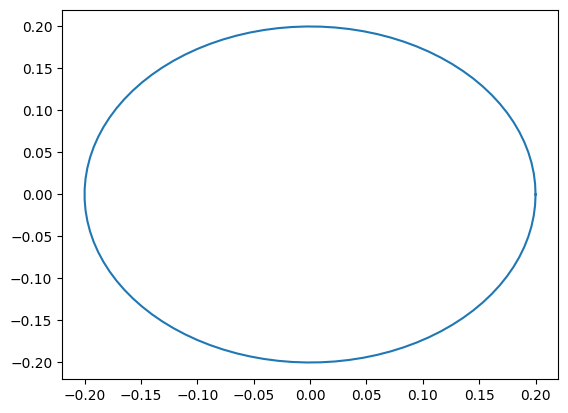

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

rho=0.20 #m
def loop(phi):
    return (np.array([rho*math.cos(phi),rho*math.sin(phi),0]),np.array([-rho*math.sin(phi),rho*math.cos(phi),0]))

philist=np.linspace(0,2*math.pi,100)
rdrloop=np.array([loop(phi) for phi in philist])
plt.plot(rdrloop[:,0,0],rdrloop[:,0,1])

## Integrate the Magnetic Field

Write a function Bloop(x,z) that calculates the vector magnetic field at the point (x,0,z), due to the single loop of wire centered at (0,0,0). Because the system is cylindrically symmetric, the magnetic field can only have components in the z and $\rho$ directions and therefore for any point,$\vec{r}$, $\vec{B}(\vec{r})=B_\rho \hat{\rho}+B_z\hat{z}$. For the point $(x,0,z), \rho=x, z=z$; this allows us to do our calculations in cartesian coordinates, putting $B_\rho=B_x.$ Plot $B_z$ versus z at x=(0,0.06,0.12,0.18,0.24,0.30) m over the range -0.2<z<0.2 m.  

In [5]:
from scipy.constants import mu_0,pi,c
from scipy.integrate import quad_vec

I=50 #A
const=mu_0/(4*pi)*I

def dBloop(phi):
    l,dl=loop(phi)
    r=rField-l
    return const* np.cross(dl,r)/np.linalg.norm(r)**3

def Bloop(x,z):
    global rField
    rField=np.array([x,0,z])
    return quad_vec(dBloop,0,2*math.pi)[0]


CPU time: 1.6683711840000006 4.887686046


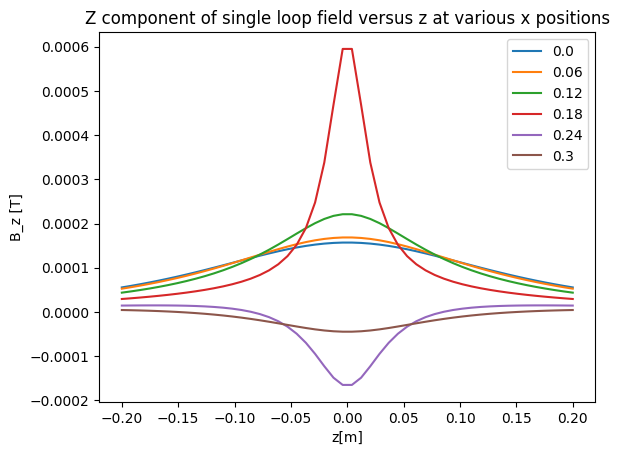

In [6]:
import time
zpos=np.linspace(-0.2,0.2)
xpos=np.linspace(0,0.3,6)
start=time.process_time()
Barray=[[Bloop(x,z) for z in zpos] for x in xpos]
Barray=np.array(Barray)
print('CPU time:',time.process_time()-start,start)

for i in range(0,6):
    plt.plot(zpos,Barray[i,:,2],label=f'{xpos[i]}')
plt.title("Z component of single loop field versus z at various x positions")
plt.xlabel("z[m]")
plt.ylabel("B_z [T]")
plt.legend()

# The Field due to Two loops

We can use the superposition principle to find the field, $\vec{B}_2(\vec{r})$ due to two loops, with centers at $\vec{c}_1$ and $\vec{c}_2$:

$$\vec{B}_2(\vec{r})= B(\vec{r}-\vec{c}_1)+B(\vec{r}-\vec{c}_2),$$

where $\vec{B}(\vec{r})$ is the single coil field at point \vec{r}, with the coil at the origin.

Define the function and plot the x and z components of the field along the axes, concentrating on the region where the field is uniform.  


In [179]:
def B2(x,z,delta=0.10):
    return Bloop(x,z-delta)+Bloop(x,z+delta)

In [180]:
xr=np.linspace(-.1,.1)
brloops=np.array([B2(x,0) for x in xr]) #field along x axes
bzloops=np.array([B2(0,z) for z in xr]) #field along z axis

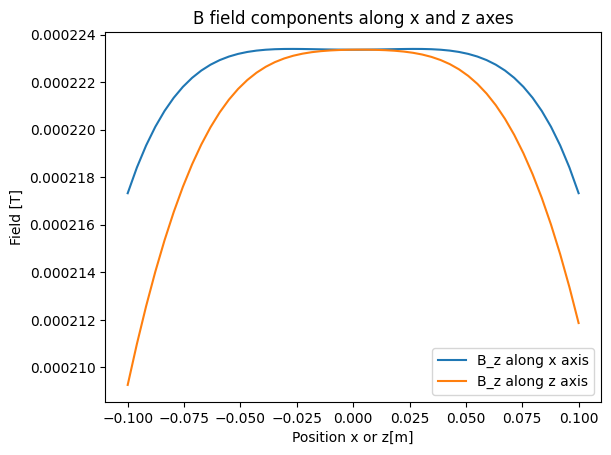

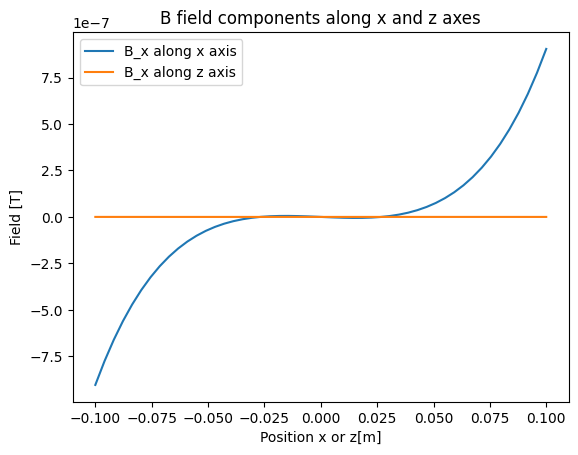

In [181]:
plt.plot(xr,brloops[:,2],label='B_z along x axis')
plt.plot(xr,bzloops[:,2],label='B_z along z axis')
plt.title("B field components along x and z axes")
plt.xlabel("Position x or z[m]")
plt.ylabel("Field [T]")
plt.legend()
plt.show()
plt.plot(xr,brloops[:,0],label='B_x along x axis')
plt.plot(xr,bzloops[:,0],label='B_x along z axis')
plt.title("B field components along x and z axes")
plt.xlabel("Position x or z[m]")
plt.ylabel("Field [T]")
plt.legend()

# The coil function- a geometrically improved calculation

We now calculate the field due to the actual current. We start by
writing a function coil(phi,layer) which returns the position and direction (the vectors $\vec{r}'$ and $\vec{dl}$) of the wire in a coil as a function of the angle $\phi$ for the wire in one layer of one of the coils. Make the coil out of ten layers, which we integrate separately and then add. Since each layer has 10 turns, $0 < \phi< 20\pi.$ The wire diameter $d=0.7~\rm{mm}.$ Have the inner layer of the coil start at $z_0=-5d, \rho_0=20-4.5d$ and wound from left to right. The wire follows a helix in z (so $z=z0+ \alpha \phi$). The second layer starts at $z_0=5d,\rho_0=20-3.5d$ and ends at $z=-5d,$ and is wound from right to left.

Make plots to demonstrate that your coil function works- for instance z versus phi for each layer. You probably also want to plot z versus x for $\phi=0,\pi/2,\pi,3\pi/2$ etc. A careful investigation of these plots will show that the transition from one layer to the next is an approximation, and a physical coil would have a slighly different shape- in reality the layers would be connected by short vertical steps.  However, the shape we have is smooth and differentiable, which makes the integrals converge more quickly. 

Validate your calculation of $\vec{dl}$ by doing the numerical derivative of $\frac {d\vec{r}}{d\phi}.$ 

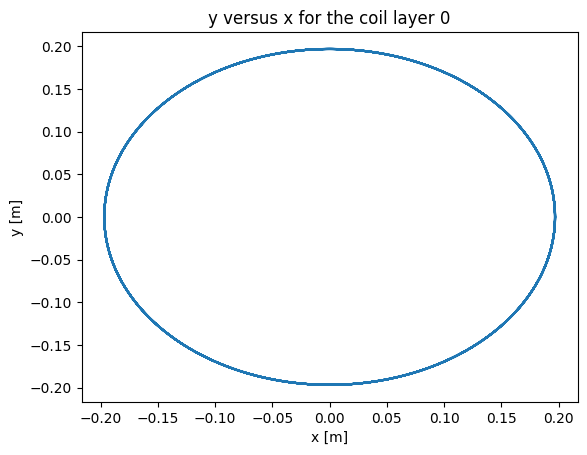

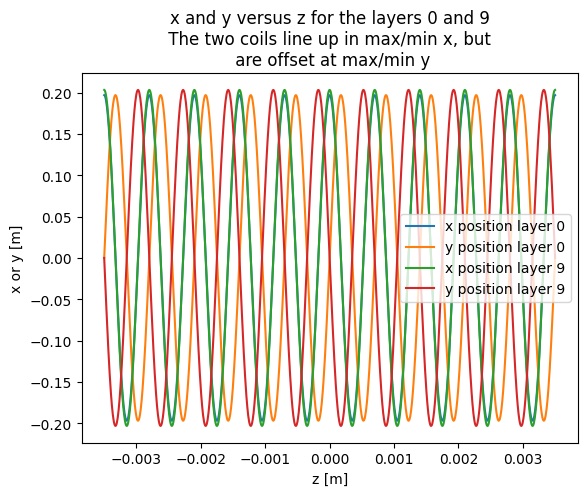

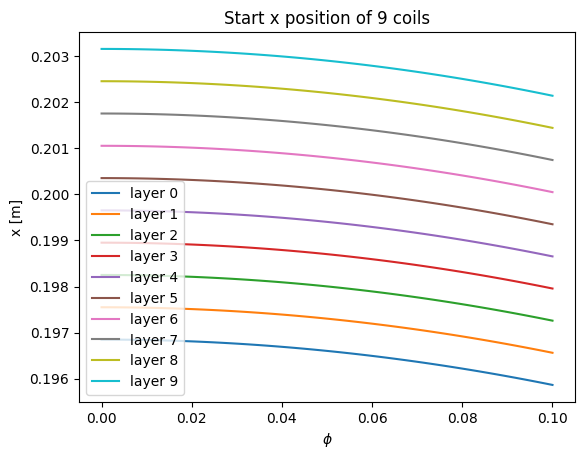

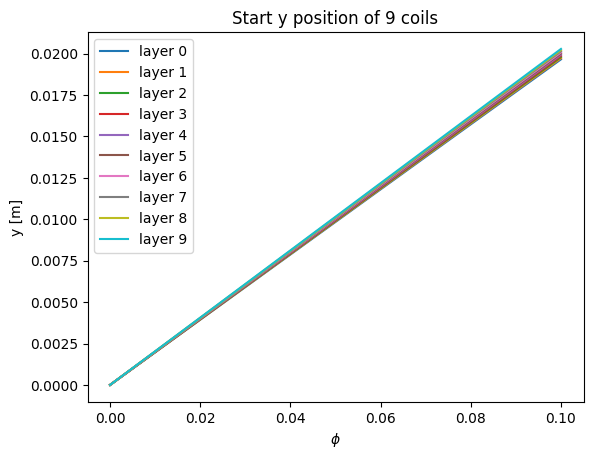

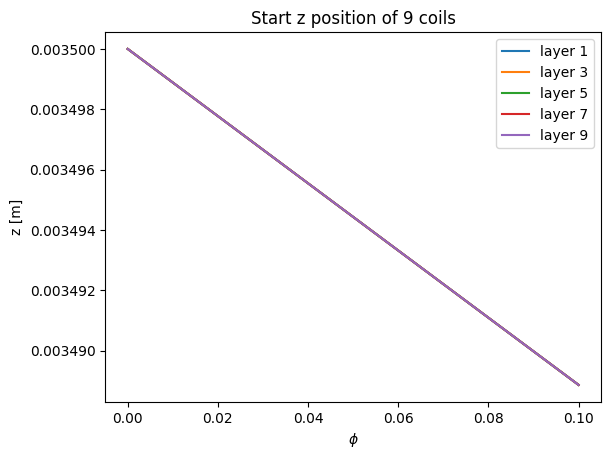

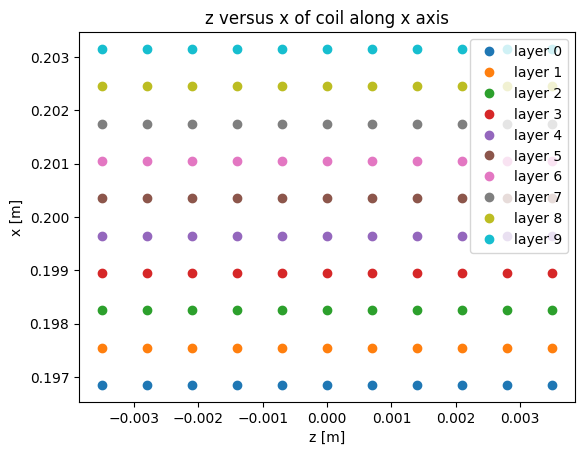

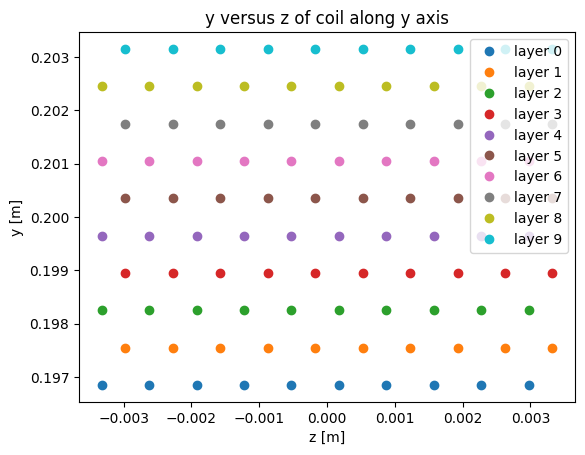

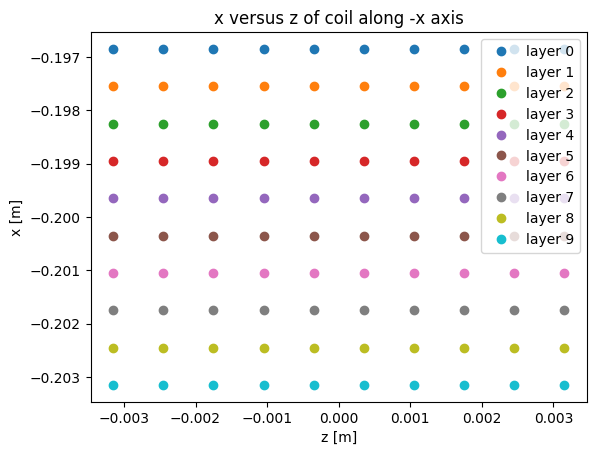

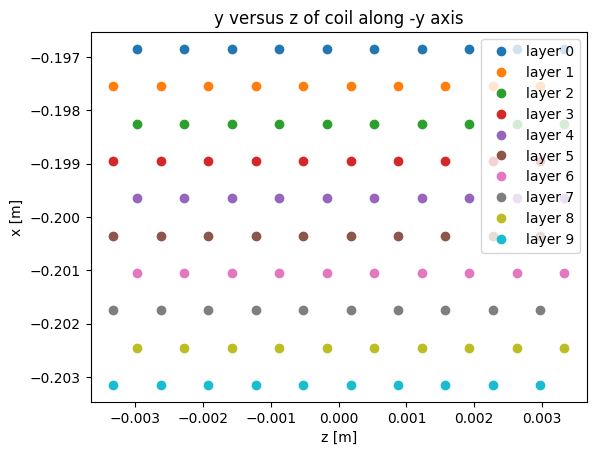

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

wired=0.0007 #m
Nturns=10
Nlayers=10
z0=-5*wired
rho0=0.20-4.5*wired
alpha=wired/(2*math.pi)
phimax=Nturns*2*math.pi
def coil(phi,layer):  #phi, layer are both scalars
    if 0<=layer<10 and 0<=phi<=20*math.pi:
        if layer%2==0:
            z=z0+phi*alpha
            dzdphi=alpha
        else:
            z=-z0-phi*alpha
            dzdphi=-alpha
        rho=rho0+layer*wired
        l=np.array([rho*math.cos(phi), rho*math.sin(phi),z])
        dl=np.array([-rho*math.sin(phi),rho*math.cos(phi),dzdphi])
        return(l,dl)
    else:
        print(f'Bad argument {phi}')
        return 0 #should cause code to crash

#plot inner coil
philist=np.linspace(0*math.pi,20*math.pi,1000)
rdr=np.array([coil(phi,0) for phi in philist])
rdrout=np.array([coil(phi,9) for phi in philist])
plt.plot(rdr[:,0,0],rdr[:,0,1])
plt.title("y versus x for the coil layer 0")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()
plt.plot(rdr[:,0,2],rdr[:,0,0],label='x position layer 0')
plt.plot(rdr[:,0,2],rdr[:,0,1],label='y position layer 0')
plt.plot(rdrout[:,0,2],rdrout[:,0,0],label='x position layer 9')
plt.plot(rdrout[:,0,2],rdrout[:,0,1],label='y position layer 9')
plt.title("x and y versus z for the layers 0 and 9\n The two coils line up in max/min x, but \n are offset at max/min y")
plt.xlabel("z [m]")
plt.ylabel("x or y [m]")
plt.legend()
plt.show()
# notice that the two layers are wound in opposite directions, so 

#plot all the layers between 0 and 0.1 radians
pl=np.linspace(0,0.1)
for l in range(0,10):
    plt.plot(pl,[coil(phi,l)[0][0] for phi in pl],label=f'layer {l}')
plt.title('Start x position of 9 coils')
plt.xlabel('$\phi$')
plt.ylabel('x [m]')
plt.legend()

plt.show()

for l in range(0,10):
    plt.plot(pl,[coil(phi,l)[0][1] for phi in pl],label=f'layer {l}')
plt.title('Start y position of 9 coils')
plt.xlabel('$\phi$')
plt.ylabel('y [m]')
plt.legend()

plt.show()

for l in range(0,5):
    plt.plot(pl,[coil(phi,2*l+1)[0][2] for phi in pl],label=f'layer {2*l+1}')
plt.title('Start z position of 9 coils')
plt.xlabel('$\phi$')
plt.ylabel('z [m]')
plt.legend()

plt.show()
             


phi2=np.linspace(0,20*math.pi,11)
for l in range(0,10):
    rdr2=np.array([coil(phi,l) for phi in phi2])
    plt.plot(rdr2[:,0,2],rdr2[:,0,0],'o',label=f'layer {l}')
plt.title("z versus x of coil along x axis")
plt.xlabel("z [m]")
plt.ylabel("x [m]")
plt.legend()
plt.show()
for l in range(0,10):
    rdr2=np.array([coil(phi+math.pi/2,l) for phi in phi2[:-1]])
    plt.plot(rdr2[:,0,2],rdr2[:,0,1],'o',label=f'layer {l}')
plt.title("y versus z of coil along y axis")
plt.xlabel("z [m]")
plt.ylabel("y [m]")
plt.legend()
plt.show()
for l in range(0,10):
    rdr2=np.array([coil(phi+math.pi,l) for phi in phi2[:-1]])
    plt.plot(rdr2[:,0,2],rdr2[:,0,0],'o',label=f'layer {l}')
plt.title("x versus z of coil along -x axis")
plt.xlabel("z [m]")
plt.ylabel("x [m]")
plt.legend()
plt.show()
for l in range(0,10):
    rdr2=np.array([coil(phi+3*math.pi/2,l) for phi in phi2[:-1]])
    plt.plot(rdr2[:,0,2],rdr2[:,0,1],'o',label=f'layer {l}')
plt.title("y versus z of coil along -y axis")
plt.xlabel("z [m]")
plt.ylabel("x [m]")
plt.legend()
plt.show()


Validate the $\vec{dl}$ calculation by comparing analytic and numerical derivative.

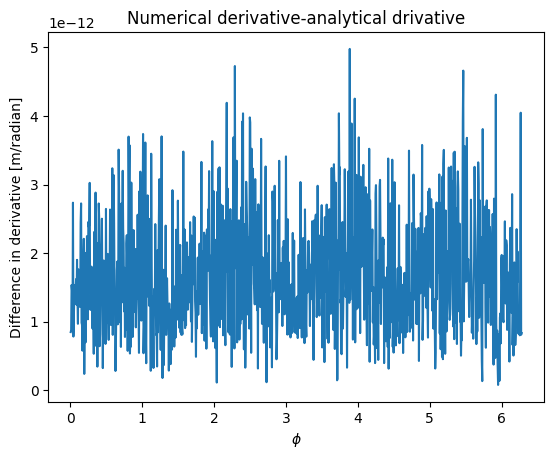

In [10]:
#calculate numerical derivative of r', and compare to dl
philist=np.linspace(0,2*math.pi,1000)
dphi=5e-6
diff=np.array([(coil(phi+dphi,0)[0]-coil(phi-dphi,0)[0])/((phi+dphi)-(phi-dphi))-coil(phi,0)[1] for phi in philist[1:-1]])
plt.plot(philist[1:-1],np.linalg.norm(diff,axis=1))
plt.title("Numerical derivative-analytical drivative")
plt.xlabel(r"$\phi$")
plt.ylabel("Difference in derivative [m/radian]")
plt.show()

## Now calculate the single coil field

Define a vector function dB(phi). dB will also depend on the vector rField, which is where we want to calculate the field; you will need to pass that as a parameter or a global variable.

Then define vector function B(x,z) at rField=(x,0,z). Calculate a few points, and then plot the field components along the x and z axes.

Note that this integration might be pretty slow- on my computer it takes about 1 second/field point. 


In [11]:
from scipy.constants import mu_0,pi,c
from scipy.integrate import quad_vec

I=0.5 #A
const=mu_0/(4*pi)*I
layer=0

def dB(phi):
    global layer
    l,dl=coil(phi,layer)
    r=rField-l
    return const* np.cross(dl,r)/np.linalg.norm(r)**3

def B(x,z):
    global rField,layer
    rField=np.array([x,0,z])
    b=[]
    for l in range(0,10):
        layer=l
        b.append(quad_vec(dB,0,phimax)[0])
    return np.sum(np.array(b),axis=0)



In [12]:
phimax

62.83185307179586

CPU time: 92.88180811999999 8.972257819


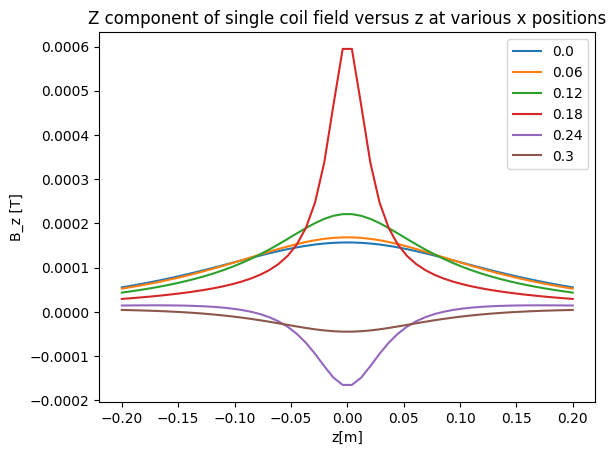

In [13]:
import time
zpos=np.linspace(-0.2,0.2)
xpos=np.linspace(0,0.3,6)
start=time.process_time()
Barray=[[B(x,z) for z in zpos] for x in xpos]
Barray=np.array(Barray)
print('CPU time:',time.process_time()-start,start)

for i in range(0,6):
    plt.plot(zpos,Barray[i,:,2],label=f'{xpos[i]}')
plt.title("Z component of single coil field versus z at various x positions")
plt.xlabel("z[m]")
plt.ylabel("B_z [T]")
plt.legend()

# The Field due to Helmholtz coils

We can use the superposition principle to find the field, $\vec{B}_H(\vec{r})$ due to two coils, with centers at $\vec{c}_1$ and $\vec{c}_2$:

$$\vec{B}_H(\vec{r})= B(\vec{r}-\vec{c}_1)+B(\vec{r}-\vec{c}_2),$$

where $\vec{B}(\vec{r})$ is the single coil field at point \vec{r}, with the coil at the origin.

Define the function and plot the x and z components of the field along the axes, concentrating on the region where the field is uniform.  


In [14]:
def Helm(x,z,delta=0.10):
    return B(x,z-delta)+B(x,z+delta)

In [15]:
xr=np.linspace(-.1,.1)
br=np.array([Helm(x,0) for x in xr])
bz=np.array([Helm(0,z) for z in xr])

NameError: name 'brloops' is not defined

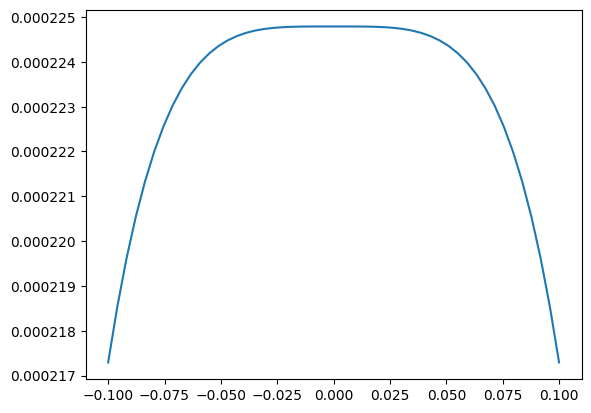

In [16]:
plt.plot(xr,br[:,2],label='B_z along x axis')
plt.plot(xr,brloops[:,2],label='B_z along x axis,loops')
plt.plot(xr,bz[:,2],label='B_z along z axis')
plt.plot(xr,bzloops[:,2],label='B_z along z axis, loops')
plt.title("B field components along x and z axes")
plt.xlabel("Position x or z[m]")
plt.ylabel("Field [T]")
plt.legend()
plt.show()
plt.plot(xr,br[:,0],label='B_x along x axis')
plt.plot(xr,brloops[:,0],label='B_x along x axis, loops')
plt.plot(xr,bz[:,0],label='B_x along z axis')
plt.plot(xr,bzloops[:,0],label='B_x along z axis,loops')
plt.title("B field components along x and z axes")
plt.xlabel("Position x or z[m]")
plt.ylabel("Field [T]")
plt.legend()
plt.show()
plt.plot(xr,br[:,2]/brloops[:,2],label='B_z along x axis')
plt.plot(xr,bz[:,2]/bzloops[:,2],label='B_z along z axis')
plt.title("Ratio of calculations for B field components along x and z axes")
plt.xlabel("Position x or z[m]")
plt.ylabel("Ratio")
plt.legend()
plt.show()

2. Replot the z components of the field if we change the spacing between the coils by 1 cm?  2 cm?

In [ ]:
br1050=np.array([Helm(x,0,0.1050) for x in xr])
bz1050=np.array([Helm(0,z,0.1050) for z in xr])
br1100=np.array([Helm(x,0,0.11) for x in xr])
bz1100=np.array([Helm(0,z,0.11) for z in xr])

In [ ]:
plt.plot(xr,br1050[:,2],label='B_z along x axis')
plt.plot(xr,bz1050[:,2],label='B_z along z axis')
plt.title("B field components along x and z axes, coil spacing 21 cm")
plt.xlabel("Position x or z[m]")
plt.ylabel("Field [T]")
plt.legend()
plt.show()
plt.plot(xr,br1100[:,0],label='B_x along x axis')
plt.plot(xr,bz1100[:,0],label='B_x along z axis')
plt.title("B field components along x and z axes, coil spacing 22 cm")
plt.xlabel("Position x or z[m]")
plt.ylabel("Field [T]")
plt.legend()

In [ ]:
p